# Import Libraries + Drive

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [ ]:
# Import Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data

In [ ]:
# Read and copy data
data = pd.read_csv('/content/drive/MyDrive/Spotify/Spotify_API_csv/SpotifyAPI_Jazz.csv')
data1 = data.copy()
#data1.head()

# Drop categorical columns to avoid artist bias
data1 = data1.drop(['Unnamed: 0', 'name', 'artist'], axis=1)

# Split df into X and y
y = data1['hit']
X = data1.drop('hit', axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Scale
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

# Get feature names
feature_names = X_train.columns

# See number of hits vs not hits
print("Number of 1 values:", sum(y == 1))
print("Number of 0 values:", sum(y == 0))

Number of 1 values: 321
Number of 0 values: 9679


# Model Run and Results

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42).fit(X_train, y_train),
    "K-Nearest Neighbors": KNeighborsClassifier().fit(X_train, y_train),
    "Decision Tree": DecisionTreeClassifier(random_state=42).fit(X_train, y_train),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42).fit(X_train, y_train),
    "Support Vector Machine (Linear Kernel)": LinearSVC(random_state=42).fit(X_train, y_train),
    "Support Vector Machine (RBF Kernel)": SVC(random_state=42).fit(X_train, y_train),
    "GradientBoostingClassifier": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42).fit(X_train, y_train),
    "ADABoostClassifier": AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42), n_estimators=100, learning_rate=0.5, random_state=42).fit(X_train, y_train),     
}

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
# Model Accuracy
for name, model in models.items():
    print(name + ":\n\tAccuracy: {:.2f}%".format(model.score(X_test, y_test) * 100))
    y_pred = model.predict(X_test)
    print("\tF1 Score: {:.2f}%\n".format(f1_score(y_test, y_pred) * 100))

Logistic Regression:
	Accuracy: 96.57%
	F1 Score: 5.50%

K-Nearest Neighbors:
	Accuracy: 96.20%
	F1 Score: 28.75%

Decision Tree:
	Accuracy: 97.03%
	F1 Score: 51.89%

Random Forest:
	Accuracy: 97.53%
	F1 Score: 52.56%

Support Vector Machine (Linear Kernel):
	Accuracy: 96.60%
	F1 Score: 0.00%

Support Vector Machine (RBF Kernel):
	Accuracy: 96.60%
	F1 Score: 0.00%

GradientBoostingClassifier:
	Accuracy: 97.10%
	F1 Score: 39.16%

ADABoostClassifier:
	Accuracy: 97.50%
	F1 Score: 50.98%



In [ ]:
# Feature Importance
for name, model in models.items():
  print()
  try:
    feature_importances = model.feature_importances_

    print(name)
    # Create a dataframe of feature importances with their names
    fi_df = pd.DataFrame({'feature_names': feature_names, 'feature_importances': feature_importances})

    # Print the dataframe sorted by feature importances in descending order
    print(fi_df.sort_values('feature_importances', ascending=False))
  except:
    print(f'Unable to get feature importances for {name}')


Unable to get feature importances for Logistic Regression

Unable to get feature importances for K-Nearest Neighbors

Decision Tree
       feature_names  feature_importances
11       duration_ms             0.191534
0       danceability             0.129513
5        speechiness             0.122671
10             tempo             0.112724
1             energy             0.095984
7   instrumentalness             0.088744
3           loudness             0.069707
6       acousticness             0.062283
8           liveness             0.051978
9            valence             0.043202
2                key             0.031660
4               mode             0.000000

Random Forest
       feature_names  feature_importances
11       duration_ms             0.138579
5        speechiness             0.110592
0       danceability             0.103065
7   instrumentalness             0.098398
1             energy             0.098116
10             tempo             0.090994
9           

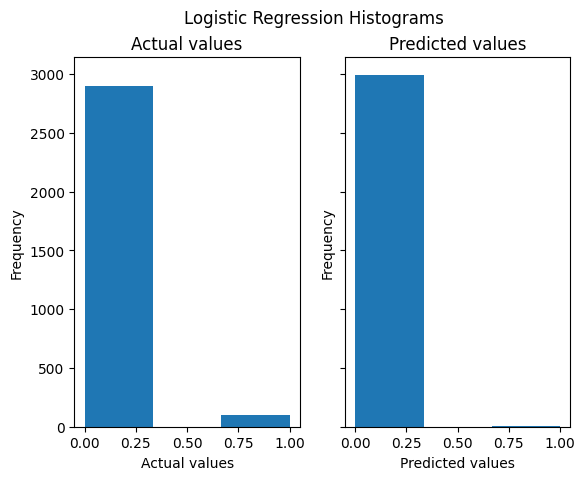

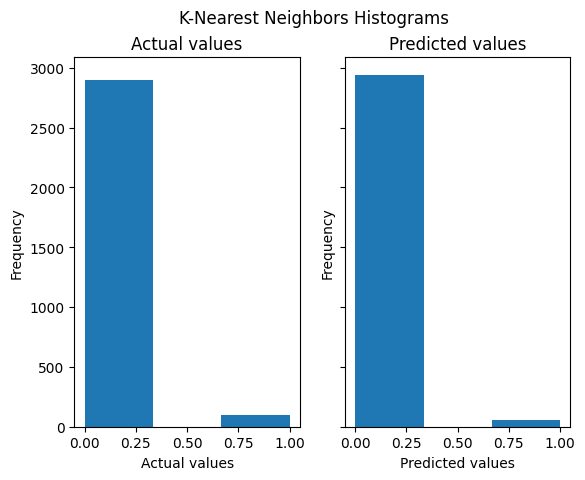

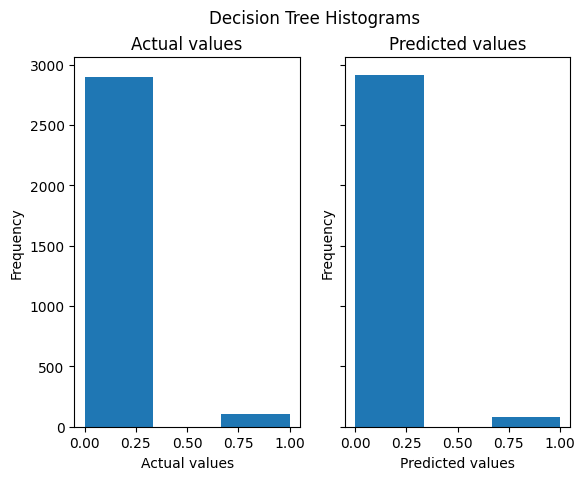

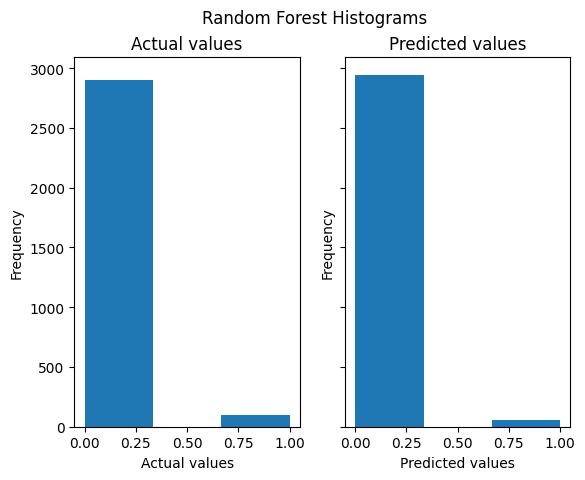

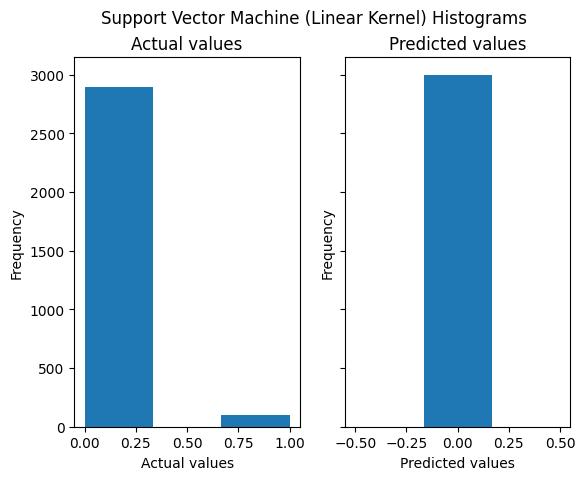

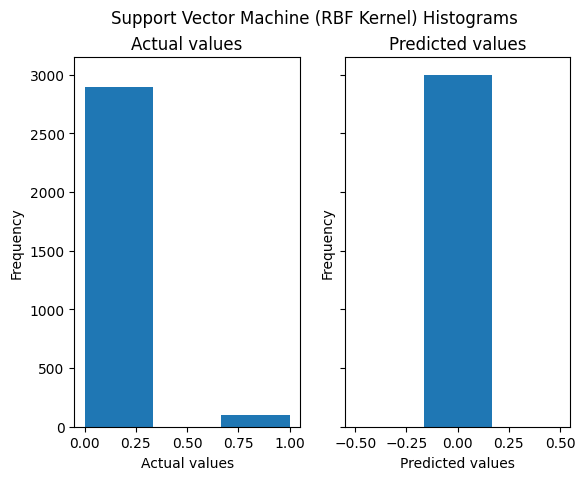

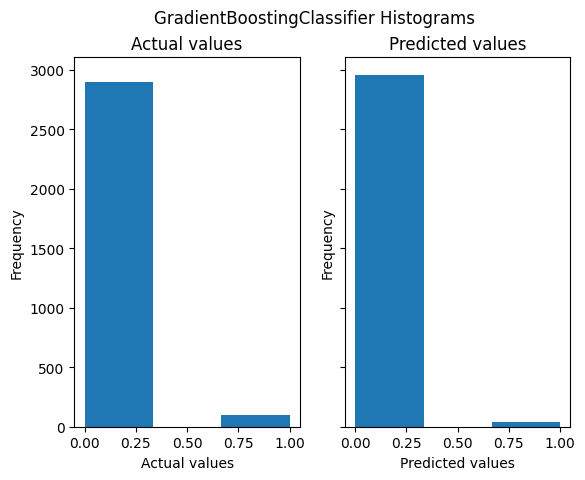

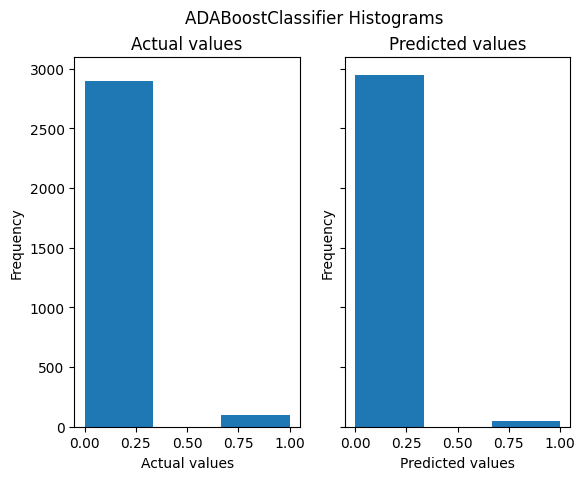

In [ ]:
# Histogram of Predictions Against Actual Values
for name, model in models.items():
  y_pred = model.predict(X_test)
  fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
  ax1.hist(y_test, bins=3)
  ax1.set_xlabel('Actual values')
  ax1.set_ylabel('Frequency')
  ax1.set_title('Actual values')
  ax2.hist(y_pred, bins=3)
  ax2.set_xlabel('Predicted values')
  ax2.set_ylabel('Frequency')
  ax2.set_title('Predicted values')
  fig.suptitle(name+" Histograms")
  plt.show()

Unable to get feature importances for Logistic Regression
Unable to get feature importances for K-Nearest Neighbors


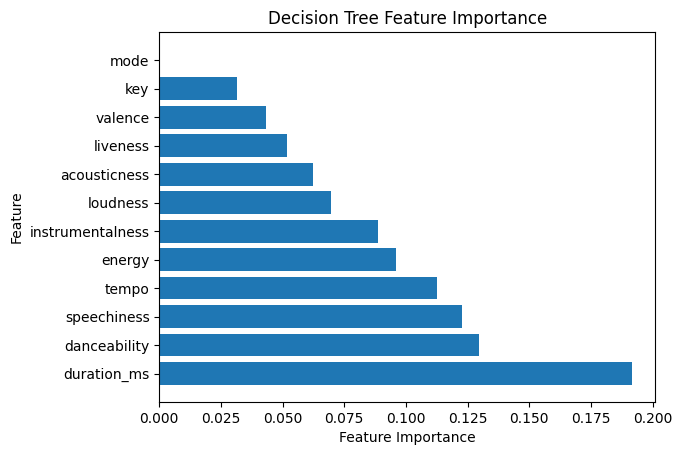

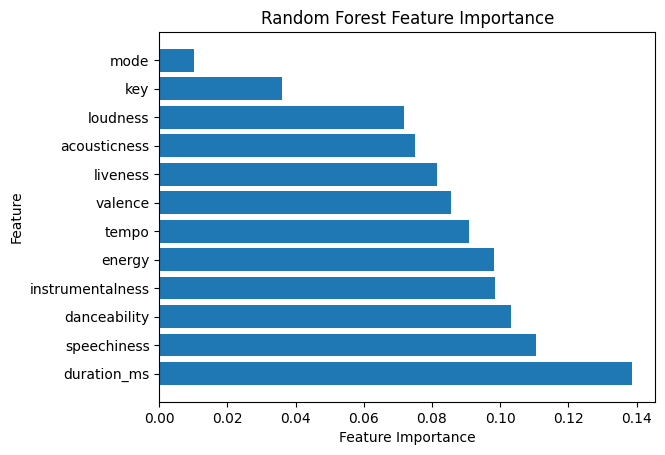

Unable to get feature importances for Support Vector Machine (Linear Kernel)
Unable to get feature importances for Support Vector Machine (RBF Kernel)


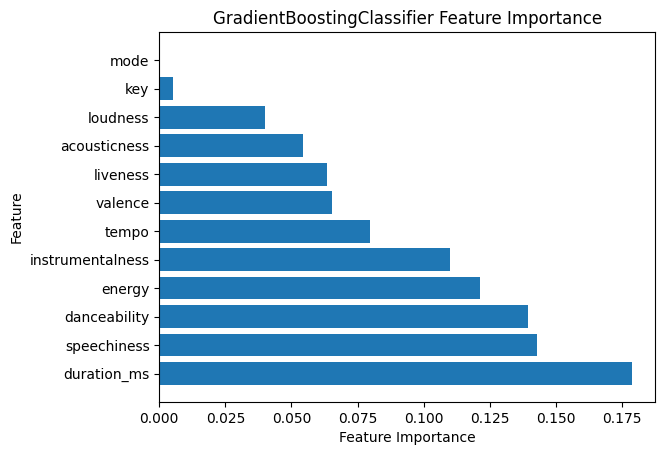

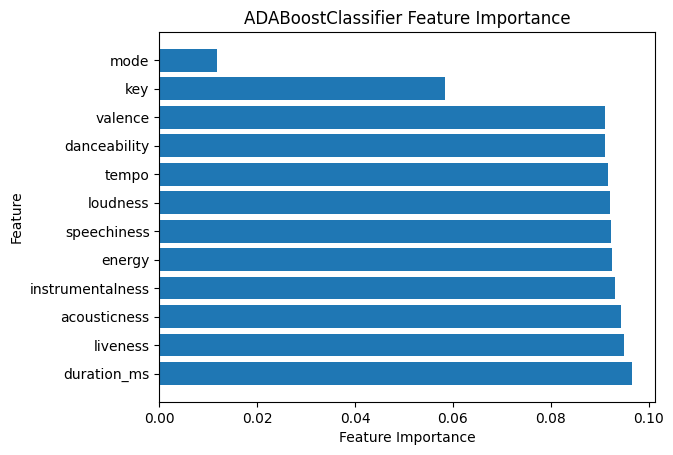

In [ ]:
# Visualization of Feature Importance
for name, model, in models.items():
  try:
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    col_names = X_train.columns.values.tolist()

    # Create bar graph of feature importances
    plt.barh(range(X.shape[1]), importances[indices], align='center')
    plt.yticks(range(X.shape[1]),  [col_names[i] for i in indices])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(name+' Feature Importance')
    plt.show()
  except:
    print(f'Unable to get feature importances for {name}')

# Hyperparameter Tuning

### Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter values to search over
param_grid = {
    'max_depth': [3, 5, 7, 11, 15],
    'n_estimators': [50, 100, 200],
}

# Create a random forest classifier object
rfc = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Print the best score
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': 15, 'n_estimators': 50}
Best score:  0.9787142857142858


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)

# Create an AdaBoost classifier with the Random Forest as the base estimator
ada_clf = AdaBoostClassifier(base_estimator=rf_clf, n_estimators=100, learning_rate=0.5, random_state=42)

# Fit the AdaBoost classifier on the training data
ada_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = ada_clf.predict(X_test)

# Evaluate the performance of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.975


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100,max_depth=11)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.9743333333333334
